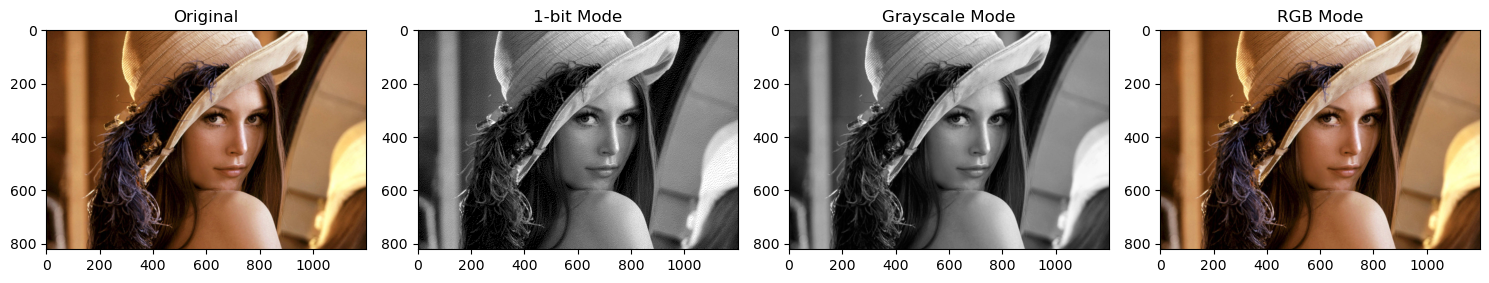

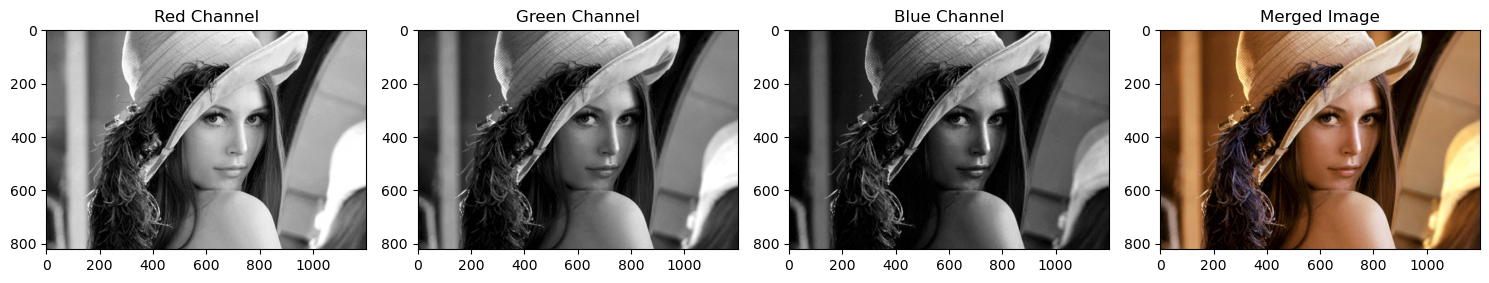

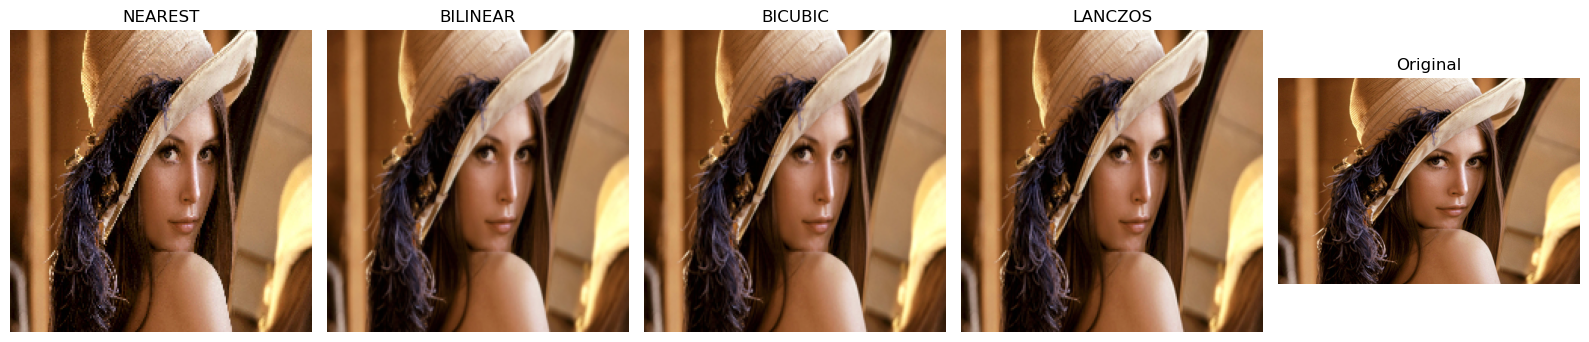

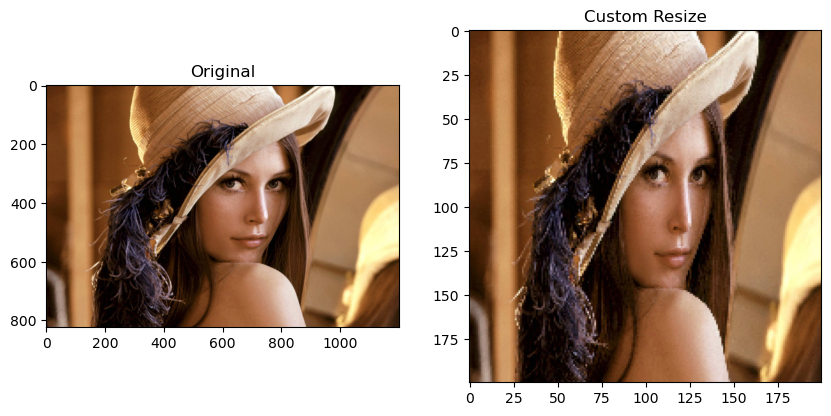

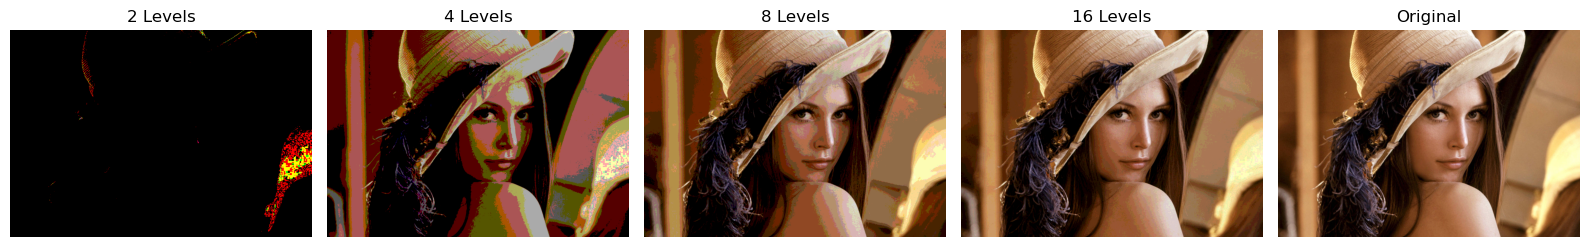

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_image_modes(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1)
    plt.title('Original')
    plt.imshow(img)
    
    img_1 = img.convert('1')
    plt.subplot(1,4,2)
    plt.title('1-bit Mode')
    plt.imshow(img_1, cmap='gray')
    
    # Grayscale mode
    img_L = img.convert('L')
    plt.subplot(1,4,3)
    plt.title('Grayscale Mode')
    plt.imshow(img_L, cmap='gray')
    
    # RGB mode
    img_RGB = img.convert('RGB')
    plt.subplot(1,4,4)
    plt.title('RGB Mode')
    plt.imshow(img_RGB)
    
    plt.tight_layout()
    plt.show()

def split_and_merge_channels(image_path):
    img = Image.open(image_path)
    
    # Split channels
    r, g, b = img.split()
    
    # Display channels
    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1)
    plt.title('Red Channel')
    plt.imshow(r, cmap='gray')
    
    plt.subplot(1,4,2)
    plt.title('Green Channel')
    plt.imshow(g, cmap='gray')
    
    plt.subplot(1,4,3)
    plt.title('Blue Channel')
    plt.imshow(b, cmap='gray')
    
    # Merge channels
    merged_img = Image.merge('RGB', (r, g, b))
    plt.subplot(1,4,4)
    plt.title('Merged Image')
    plt.imshow(merged_img)
    
    plt.tight_layout()
    plt.show()

def resize_comparison(image_path):
    img = Image.open(image_path)
    original_size = img.size
    new_size = (200, 200)
    
    # Built-in resize methods
    methods = [
        ('NEAREST', Image.NEAREST),
        ('BILINEAR', Image.BILINEAR),
        ('BICUBIC', Image.BICUBIC),
        ('LANCZOS', Image.LANCZOS)
    ]
    
    plt.figure(figsize=(16,4))
    for i, (name, method) in enumerate(methods, 1):
        resized_img = img.resize(new_size, method)
        plt.subplot(1,5,i)
        plt.title(name)
        plt.imshow(resized_img)
        plt.axis('off')
    
    plt.subplot(1,5,5)
    plt.title('Original')
    plt.imshow(img)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def custom_resize(image, new_size, method='nearest'):
    img_array = np.array(image)
    h, w = img_array.shape[:2]
    x_ratio = w / new_size[0]
    y_ratio = h / new_size[1]
    
    new_img = np.zeros((new_size[1], new_size[0], img_array.shape[2]), dtype=img_array.dtype)
    
    for y in range(new_size[1]):
        for x in range(new_size[0]):
            px = int(x * x_ratio)
            py = int(y * y_ratio)
            new_img[y, x] = img_array[py, px]
    
    return Image.fromarray(new_img)

def quantize_image(image, levels=4):
    img_array = np.array(image)
    max_val = 255
    step = max_val // (levels - 1)
    quantized = (img_array // step) * step
    return Image.fromarray(quantized.astype(np.uint8))

def main(image_path):
    display_image_modes(image_path)
    split_and_merge_channels(image_path)
    resize_comparison(image_path)
    
    img = Image.open(image_path)
    custom_resized = custom_resize(img, (200, 200))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title('Custom Resize')
    plt.imshow(custom_resized)
    plt.show()
    
    # Quantization demonstration
    img = Image.open(image_path)
    quantization_levels = [2, 4, 8, 16]
    plt.figure(figsize=(16,4))
    for i, levels in enumerate(quantization_levels, 1):
        quantized = quantize_image(img, levels)
        plt.subplot(1,5,i)
        plt.title(f'{levels} Levels')
        plt.imshow(quantized)
        plt.axis('off')
    
    plt.subplot(1,5,5)
    plt.title('Original')
    plt.imshow(img)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

main('img2.jpeg')